In [1]:
import itk
import numpy as np
import matplotlib.pyplot as plt

import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual

In [2]:
img = itk.imread("BrainExample.nii")

In [3]:
dict(img)

{'ITK_FileNotes': '',
 'aux_file': 'none',
 'bitpix': '32',
 'cal_max': '0',
 'cal_min': '0',
 'datatype': '16',
 'descrip': '',
 'dim[0]': '3',
 'dim[1]': '160',
 'dim[2]': '192',
 'dim[3]': '160',
 'dim[4]': '1',
 'dim[5]': '1',
 'dim[6]': '1',
 'dim[7]': '1',
 'dim_info': '0',
 'intent_code': '0',
 'intent_name': '',
 'intent_p1': '0',
 'intent_p2': '0',
 'intent_p3': '0',
 'nifti_type': '1',
 'pixdim[0]': '0',
 'pixdim[1]': '1',
 'pixdim[2]': '1',
 'pixdim[3]': '1',
 'pixdim[4]': '1',
 'pixdim[5]': '1',
 'pixdim[6]': '1',
 'pixdim[7]': '1',
 'qfac': 0.0,
 'qform_code': '0',
 'qform_code_name': 'NIFTI_XFORM_UNKNOWN',
 'qoffset_x': '0',
 'qoffset_y': '0',
 'qoffset_z': '0',
 'qto_xyz': itkMatrixF44 ([[1.0, 0.0, 0.0, 0.0], [0.0, 1.0, 0.0, 0.0], [0.0, 0.0, 1.0, 0.0], [0.0, 0.0, 0.0, 1.0]]),
 'quatern_b': '0',
 'quatern_c': '0',
 'quatern_d': '0',
 'scl_inter': '0',
 'scl_slope': '0',
 'sform_code': '1',
 'sform_code_name': 'NIFTI_XFORM_SCANNER_ANAT',
 'slice_code': '0',
 'slice_duratio

In [4]:
img_np = np.asarray(img)
img_np

array([[[0.00462963, 0.00308642, 0.00617284, ..., 0.00540123,
         0.00231481, 0.00462963],
        [0.00462963, 0.00462963, 0.        , ..., 0.00385802,
         0.00617284, 0.00462963],
        [0.00385802, 0.00771605, 0.00925926, ..., 0.00617284,
         0.00694444, 0.0007716 ],
        ...,
        [0.0007716 , 0.00462963, 0.00848765, ..., 0.00771605,
         0.00231481, 0.00385802],
        [0.00385802, 0.00462963, 0.00462963, ..., 0.0007716 ,
         0.00848765, 0.00308642],
        [0.00848765, 0.00308642, 0.00925926, ..., 0.00540123,
         0.        , 0.00308642]],

       [[0.00462963, 0.00617284, 0.00462963, ..., 0.01003086,
         0.00925926, 0.00462963],
        [0.00462963, 0.00154321, 0.00231481, ..., 0.01234568,
         0.00462963, 0.00617284],
        [0.00462963, 0.00154321, 0.        , ..., 0.00231481,
         0.01003086, 0.00771605],
        ...,
        [0.00308642, 0.00462963, 0.00231481, ..., 0.0007716 ,
         0.01234568, 0.00154321],
        [0.0

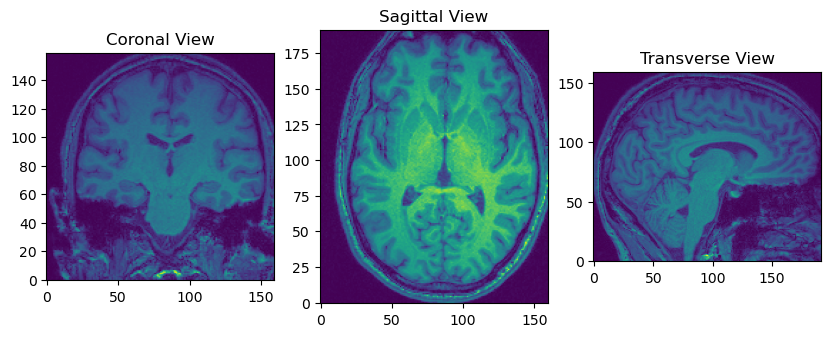

In [35]:
fig = plt.figure(figsize=(10,20))
                 
ax = fig.add_subplot(1,3,1)
ax.set_title("Coronal View")
imgplot = plt.imshow(img_np[:,int((int(dict(img)['dim[2]']))/2),:], origin = "lower")
ax = plt.gca()
ax.set_aspect((float(dict(img)['pixdim[1]']))/(float(dict(img)['pixdim[3]'])))



ax = fig.add_subplot(1,3,2)
ax.set_title("Sagittal View")
imgplot = plt.imshow(img_np[int((int(dict(img)['dim[1]']))/2),:,:], origin = "lower")
ax = plt.gca()
ax.set_aspect((float(dict(img)['pixdim[2]']))/(float(dict(img)['pixdim[3]'])))

ax = fig.add_subplot(1,3,3)
ax.set_title("Transverse View")
imgplot = plt.imshow(img_np[:,:,int((int(dict(img)['dim[3]']))/2)], origin = "lower")
ax = plt.gca()
ax.set_aspect((float(dict(img)['pixdim[1]']))/(float(dict(img)['pixdim[2]'])))



In [27]:
img_npflipped = np.flipud(img_np)


In [41]:

def plotMRICorTransSag(ycor, ztrans, xsag):
    fig = plt.figure(figsize=(10,20))
                 
    ax = fig.add_subplot(1,3,1)
    ax.set_title("Coronal View")
    imgplot = plt.imshow(img_np[:,ycor,:], origin = "lower")
    ax = plt.gca()
    ax.set_aspect((float(dict(img)['pixdim[1]']))/(float(dict(img)['pixdim[3]'])))



    ax = fig.add_subplot(1,3,2)
    ax.set_title("Sagittal View")
    imgplot = plt.imshow(img_np[xsag,:,:], origin = "lower")
    ax = plt.gca()
    ax.set_aspect((float(dict(img)['pixdim[2]']))/(float(dict(img)['pixdim[3]'])))

    ax = fig.add_subplot(1,3,3)
    ax.set_title("Transverse View")
    imgplot = plt.imshow(img_np[:,:,ztrans], origin = "lower")
    ax = plt.gca()
    ax.set_aspect((float(dict(img)['pixdim[1]']))/(float(dict(img)['pixdim[2]'])))

In [38]:
ycor_slider = widgets.IntSlider(min=0, max=192,step=1,value=96)
ztrans_slider = widgets.IntSlider(min=0, max=160,step=1,value=80)
xsag_slider = widgets.IntSlider(min=0, max=160,step=1,value=80)

In [42]:
widgets.interact(plotMRICorTransSag,ycor=ycor_slider, ztrans=ztrans_slider, xsag=xsag_slider)

interactive(children=(IntSlider(value=96, description='ycor', max=192), IntSlider(value=80, description='ztran…

<function __main__.plotMRICorTransSag(ycor, ztrans, xsag)>